In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
df.label.unique().tolist()

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
num = df.select_dtypes(exclude="object").columns.tolist()
num

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [10]:
corr_matrix = df[num].corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


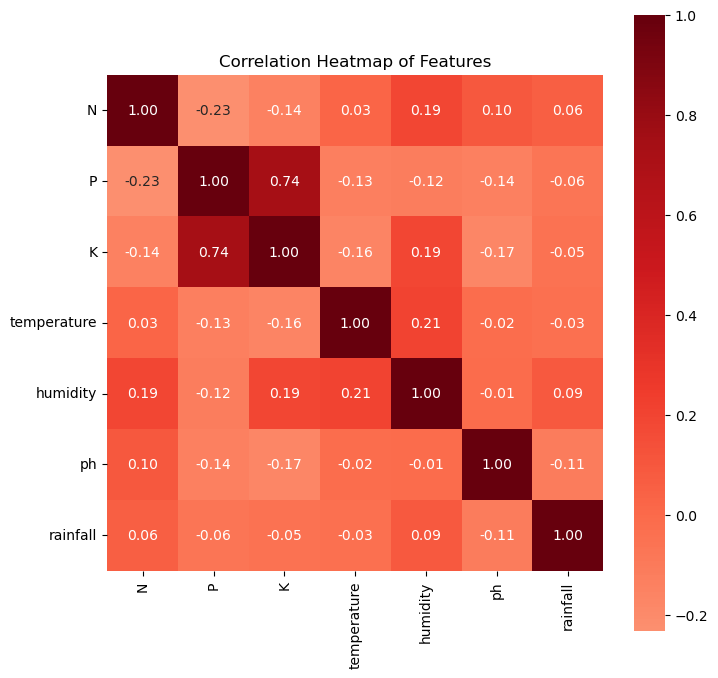

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(
    data = corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='Reds',
    square=True,
    center=0
    
)
plt.title('Correlation Heatmap of Features')
plt.show()

In [12]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [13]:
df.label

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [19]:
x = df.drop(columns='label',axis=1)
y =df['label'] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled   = scaler.transform(x_val)
x_test_scaled  = scaler.transform(x_test)

In [30]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Step 1: scale
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Step 2: model
])

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [35]:
y_pred = pipeline.predict(X_test)
y_pred

array([16,  1,  6, 11, 16,  3, 20,  2,  1, 16, 21, 19, 21, 11, 13,  7,  7,
       12, 12,  0,  2,  0, 13,  9,  0,  8, 13, 21, 20,  5, 12,  8,  1,  5,
        8,  2,  7,  7,  2,  8,  4, 17, 12, 11, 10,  8,  6, 10,  3, 14, 17,
       19, 18, 21, 12,  2, 17, 17,  5, 10, 10, 13,  5,  1, 17, 20, 16,  4,
        2, 19,  1, 15, 21, 10,  1,  4, 13, 14, 14, 12,  5, 21, 15,  9, 12,
       19, 16,  6,  4, 17, 13, 14, 13,  6,  8,  7,  6,  3,  8, 21, 15, 19,
       16, 18, 18,  7,  9, 10, 20, 20,  0, 14, 14,  7, 20, 15,  2, 10,  1,
       16, 16,  3, 11, 12, 11, 10,  1, 19,  4, 14,  6,  3,  8, 14, 13, 11,
        0,  3, 20, 11,  6,  8, 19, 12, 20, 17,  1, 16, 18, 10, 11,  3,  6,
       21, 13, 11, 18, 15,  0, 14,  2,  3, 11, 11,  9,  5, 16, 11,  7, 19,
        0,  4, 15,  7,  6, 10, 18,  3, 11, 13,  0, 15,  6, 21, 15, 21, 16,
       21,  5,  9,  0,  3,  2,  5, 15,  5,  0,  7,  8, 17,  4,  7, 21, 14,
       19, 18, 14, 10, 17, 15,  3,  0, 11,  3,  1, 19, 19, 11, 16,  8,  6,
        6, 11,  7, 14, 10

In [42]:
y_pred = pipeline.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

Test Accuracy: 0.9954545454545455

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, x, y, cv=5)
print("CV Accuracy:", scores.mean(), "+/-", scores.std())

CV Accuracy: 0.9949999999999999 +/- 0.003636363636363615


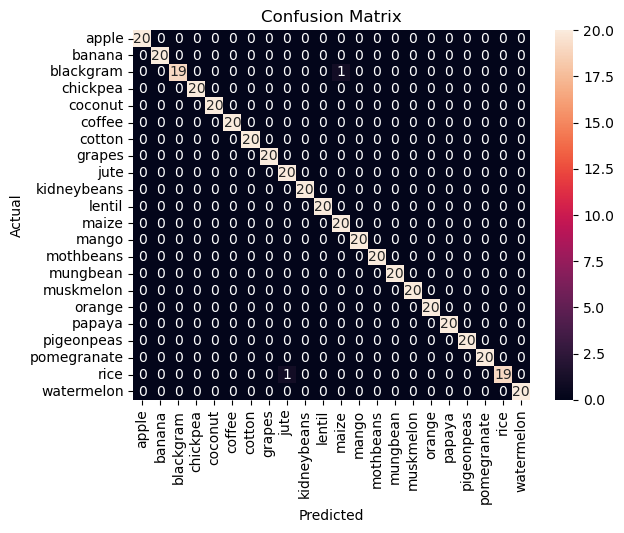

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
import joblib

# Save the entire pipeline (scaler + classifier)
joblib.dump(pipeline, 'crop_recommendation_pipeline.pkl')

# Save the label encoder (to convert 0,1,2... back to 'rice', 'maize', etc.)
joblib.dump(encoder, 'crop_label_encoder.pkl')

print(" Model and encoder saved successfully!")

 Model and encoder saved successfully!
